<a href="https://colab.research.google.com/github/Strojove-uceni/102/blob/main/102_Machine_learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo 01](https://staff.utia.cas.cz/novozada/ml1/102.png)

<img src="https://staff.utia.cas.cz/novozada/ml1/ml_graph.png">

**Source of image:** [here](https://chart-studio.plotly.com/create/?fid=SolClover:40)

**Course website:** [zoi.utia.cas.cz/ROZ2](http://zoi.utia.cas.cz/ROZ2/studijni-materialy)


# Part 1: Support-Vector Machine (SVM)


<img src="https://staff.utia.cas.cz/novozada/ml1/svm1.png">
<img src="https://staff.utia.cas.cz/novozada/ml1/svm4.jpg">
<img src="https://staff.utia.cas.cz/novozada/ml1/svmm.png">

**Linear model**
$$
\begin{aligned}
w \cdot x_i - b &\ge 1  &\textrm{if}~ y_i &= 1 \\
w \cdot x_i - b &\le -1 \quad  &\textrm{if}~  y_i &= -1\\
\\
y_i (w \cdot x_i - b) &\ge 1
\end{aligned}
$$
<br />

**Loss function**
$$
\begin{aligned}
J = \lambda||w||^2 + \frac{1}{n}\sum_{i=1}^n \max{(0, 1-y_i (w \cdot x_i - b) )}
\end{aligned}
$$
<br />
**Gradients**

if $y_i (w \cdot x_i - b) \ge 1$
$$
\begin{aligned}
J_i = \lambda||w||^2 
\end{aligned}
$$
<br />
$$
\begin{aligned}
\frac{\partial J_i}{dw_k} &= 2\lambda w_k \\
\frac{\partial J_i}{db} &= 0 \\
\end{aligned}
$$
<br />
else
$$
\begin{aligned}
J_i = \lambda||w||^2 + 1-y_i (w \cdot x_i - b) 
\end{aligned}
$$
<br />
$$
\begin{aligned}
\frac{\partial J_i}{dw_k} &= 2\lambda w_k - y_i \cdot x_i\\
\frac{\partial J_i}{db} &= y_i \\
\end{aligned}
$$
<br />


<img src="https://staff.utia.cas.cz/novozada/ml1/gd.png">

**Update rule**

For each training sample $x_i$

$$
\begin{aligned}
\omega &= \omega - \alpha \frac{\partial J_i}{d\omega} \\
b &= b - \alpha \frac{\partial J_i}{db}
\end{aligned}
$$
<br />

In [ ]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w = self.w - self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w = self.w - self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b = self.b - self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

[0.46045689 0.16122914] -0.08600000000000006


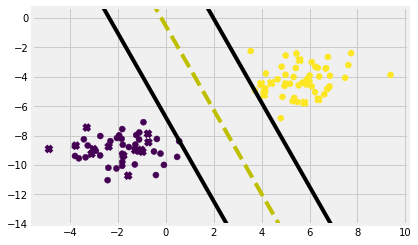

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Prepare data 
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

# 2. Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 3. Design a model
clf = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)

# 4. Train a model
clf.fit(X_train, y_train)

# 5. Make predictions
predictions = clf.predict(X_test)
print(clf.w, clf.b)

# 6. Evaluate predictions

def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=predictions)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X_train[:, 1])
x1_max = np.amax(X_train[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()

# Part 2: Quantifying the Quality of Predictions

Read documentation about [Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html) on Scikit-learn.

If $\hat{y}_i$ is the predicted value of the $i$-th sample and $y_i$
 is the corresponding true value, then the fraction of correct predictions over 
 is defined as<br /><br />

$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$ <br /><br />

where $1(x)$ is the indicator function.

In [ ]:
# 6. Evaluate predictions (numerically)
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test)

array([[13,  0],
       [ 0,  7]])

<img src="https://staff.utia.cas.cz/novozada/ml1/cm.jpg">

In [ ]:
tn, fp, fn, tp = confusion_matrix(predictions, y_test).ravel()

In [ ]:
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
precision = tp / (tp+fp)
npv = tn / (tn+fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)

In [ ]:
print(f'Sensitivity:\t{sensitivity}\nSpecificity:\t{specificity}\nPrecision:\t{precision}\nNPV:\t\t{npv}\nAccuracy:\t{accuracy} \n')

Sensitivity:	1.0
Specificity:	1.0
Precision:	1.0
NPV:		1.0
Accuracy:	1.0 



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Part 3: Naive Bayes


### **Bayes Theorem**
$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$
<br />
### **Example:** What is the probability of the card we picked at random to be a King given that it is a face card ??
<img src="https://staff.utia.cas.cz/novozada/ml1/cards.jpg">
$$ P(King|Face) = \frac{P(Face|King) \cdot P(King)}{P(Face)} = \frac{1 \cdot (1/13)}{(3/13)} = \frac{1}{3}$$
$$ P(King) = \frac{4}{52} = \frac{1}{13} $$
$$ P(Face|King) = 1 $$
$$ P(Face) = \frac{12}{52} = \frac{3}{13} $$


### **In our case**
$$ P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)} $$
with feature vector $ X = (x_1,x_2,...,x_n) $
### **We assume that all features are mutually independent**
$$ P(y|X) =
\frac{P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y) \cdot P(y)}{P(X)} $$
### **Find the class with highest probability**
$$ y = \underset{y}{\operatorname{argmax}} P(y|X) \approx argmax_y P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y) \cdot P(y) \\
\Rightarrow \underset{y}{\operatorname{argmax}} \log(P(x_1|y)) + \log(P(x_2|y)) + ... + \log(P(x_n|y))
+ \log(P(y)) $$
### **Class conditional probability** $ P(x_i|y) $
$$ P(x_i|y) =
\frac{1}{\sqrt{2 \pi \sigma_y^2}} \cdot \exp{-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}} $$



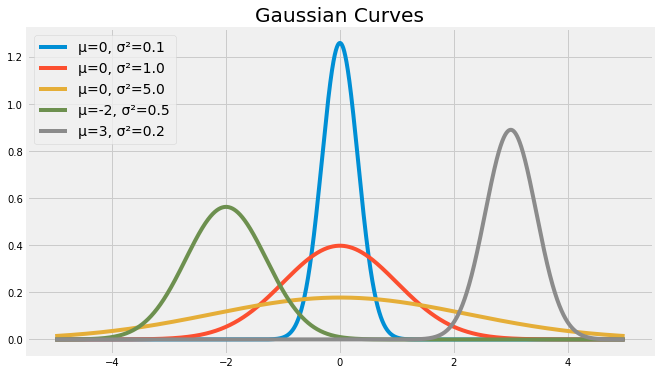

In [ ]:
# normal_curve.py

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = [0, 0, 0, -2, 3]
sigma2 = [0.1, 1.0, 5.0, 0.5, 0.2] 
x = np.arange(-5,5,0.001)
fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('fivethirtyeight')

for _mu, _sigma2 in zip(mu, sigma2):
  numerator = np.exp(-(x - _mu) ** 2 / (2 * _sigma2))
  denominator = np.sqrt(2 * np.pi * _sigma2)
  gauss = numerator / denominator  
  ax.plot(x,gauss, label=f'{chr(956)}={_mu}, {chr(963)}\u00b2={_sigma2}')

ax.set_title('Gaussian Curves')
plt.legend()
plt.show()

### Implementation

In [ ]:
import numpy as np

class NaiveBayes:
  def fit(self, X, y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    # init mean, var, priors
    self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
    self._var = np.zeros((n_classes, n_features), dtype=np.float64)
    self._priors = np.zeros(n_classes, dtype=np.float64)

    for c in self._classes:
      X_c = X[c==y]
      self._mean[c, :] = X_c.mean(axis=0)
      self._var[c, :] = X_c.var(axis=0)
      self._priors[c] = X_c.shape[0] / float(n_samples)

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return y_pred

  def _predict(self, x):
    posteriors = []
    for idx, c in enumerate(self._classes):
      prior = np.log(self._priors[idx])
      class_conditional = np.sum(np.log(self._pdf(idx, x)))
      posterior = prior + class_conditional
      posteriors.append(posterior)
    return self._classes[np.argmax(posteriors)]
        
  def _pdf(self, class_idx, x):
    mean = self._mean[class_idx]
    var = self._var[class_idx]
    numerator = np.exp(-(x - mean) ** 2 / (2 * var))
    denominator = np.sqrt(2 * np.pi * var)
    gauss = numerator / denominator
    gauss[gauss < 1e-10] = 1e-10
    return gauss

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

# 1. Prepare data 
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)

# 2. Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# 3. Design a model
nb = NaiveBayes()

# 4. Train a model
nb.fit(X_train, y_train)

# 5. Make predictions
predictions = nb.predict(X_test)

# 6. Evaluate predictions
print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.965


### Iris Data Set
* ["Perhaps the best known database to be found in the pattern recognition literature"](https://archive.ics.uci.edu/ml/datasets/iris)

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# 1. Prepare data 
iris = datasets.load_iris()
X, y = iris.data, iris.target

# 2. Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1234)

# 3. Design a model
nb = NaiveBayes()

# # 4. Train a model
nb.fit(X_train, y_train)

# # 5. Make predictions
predictions = nb.predict(X_test)

# 6. Evaluate predictions
print("Naive Bayes on Iris dataset: classification accuracy", accuracy(y_test, predictions))


Naive Bayes on Iris dataset: classification accuracy 0.9733333333333334


# Part 4: K-Means Clustering


- one of the simplest and popular unsupervised machine learning algorithms
- cluster a data set into $k$ different clusters

### **What is Clustering?**
**A simple example:** A bank wants to give credit card offers to its customers >> group the customers based on their income

<img src="https://staff.utia.cas.cz/novozada/ml1/income.jpg">

### **Properties of Clusters**
1.   Property 1 - All the data points in a cluster should be similar to each other.
2.   Property 2 - The data points from different clusters should be as different as possible. 



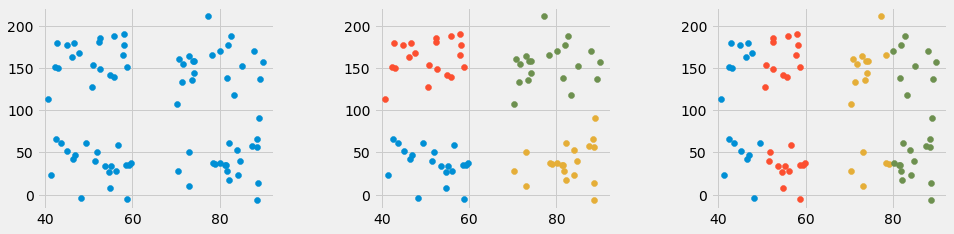

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
plt.style.use('fivethirtyeight')

center1 = (40, 40)
center2 = (40, 160)
center3 = (70, 40)
center4 = (70, 160)

distance = 20

x1 = np.random.uniform(center1[0], center1[0] + distance, size=(20,))
y1 = np.random.normal(center1[1], distance, size=(20,)) 
x2 = np.random.uniform(center2[0], center2[0] + distance, size=(20,))
y2 = np.random.normal(center2[1], distance, size=(20,)) 
x3 = np.random.uniform(center3[0], center3[0] + distance, size=(20,))
y3 = np.random.normal(center3[1], distance, size=(20,)) 
x4 = np.random.uniform(center4[0], center4[0] + distance, size=(20,))
y4 = np.random.normal(center4[1], distance, size=(20,)) 

x = np.concatenate((x1, x2, x3, x4))
y = np.concatenate((y1, y2, y3, y4))

thr = [50, 65, 80]
idx1 = np.where(x < thr[0])
idx2 = np.where((x >= thr[0]) & (x < thr[1]))[0]
idx3 = np.where((x >= thr[1]) & (x < thr[2]))[0]
idx4 = np.where(x >= thr[2])
_x1 = x[idx1]
_y1 = y[idx1]
_x2 = x[idx2]
_y2 = y[idx2]
_x3 = x[idx3]
_y3 = y[idx3]
_x4 = x[idx4]
_y4 = y[idx4]

plt.subplot(1, 3, 1)
plt.scatter(x, y)

plt.subplot(1, 3, 2)
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.scatter(x4, y4)

plt.subplot(1, 3, 3)
plt.scatter(_x1, _y1)
plt.scatter(_x2, _y2)
plt.scatter(_x3, _y3)
plt.scatter(_x4, _y4)
plt.tight_layout(pad=5.0)
plt.show()

### **Applications of Clustering**
*   Customer Segmentation
*   Document and Image Clustering
*   Image Segmentation
*   Recommendation Engines
*   ...

### **Algorithm - Iterative Optimization**

<img src="https://staff.utia.cas.cz/novozada/ml1/km_diag.png">

### **Euclidean distance**
- get the ditance between two feature vetors

$$ d(p,q) =
\sqrt{\sum{(p_i - q_i)^2}}$$



### Implementation

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display

np.random.seed(42)

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
  def __init__(self, K=5, max_iters=100, plot_steps=False, plot_delay=1):
    self.K = K
    self.iter = 0    
    self.max_iters = max_iters
    self.plot_steps = plot_steps
    self.plot_delay = plot_delay

    # list of sample indices for each cluster
    self.clusters = [[] for _ in range(self.K)]
    # the centers (mean feature vector) for each cluster
    self.centroids = []    

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    # initialize            
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)    
    self.centroids = [self.X[idx] for idx in random_sample_idxs]        

    # Optimize clusters
    for _ in range(self.max_iters):
      self.iter += 1 
      # Assign samples to closest centroids (create clusters)
      self.clusters = self._create_clusters(self.centroids)
      
      # Calculate new centroids from the clusters
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)

      # check if clusters have changed
      if self._is_converged(centroids_old, self.centroids):
        break

      if self.plot_steps:
        self.plot()

    # Classify samples as the index of their clusters
    return self._get_cluster_labels(self.clusters)

  def _get_cluster_labels(self, clusters):
    # each sample will get the label of the cluster it was assigned to
    labels = np.empty(self.n_samples)

    for cluster_idx, cluster in enumerate(clusters):
      for sample_index in cluster:
        labels[sample_index] = cluster_idx
    return labels

  def _create_clusters(self, centroids):
    # Assign the samples to the closest centroids to create clusters
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    # distance of the current sample to each centroid
    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_index = np.argmin(distances)
    return closest_index

  def _get_centroids(self, clusters):
    # assign mean value of clusters to centroids
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids

  def _is_converged(self, centroids_old, centroids):
    # distances between each old and new centroids, fol all centroids
    distances = [
                 euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
                 ]
    return sum(distances) == 0

  def plot(self):    
    fig, ax = plt.subplots(figsize=(12, 8))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)
    plt.title(f'Iteration = {self.iter}')
    display.clear_output(wait=True)
    display.display(plt.show())
    time.sleep(self.plot_delay)    
    plt.close()

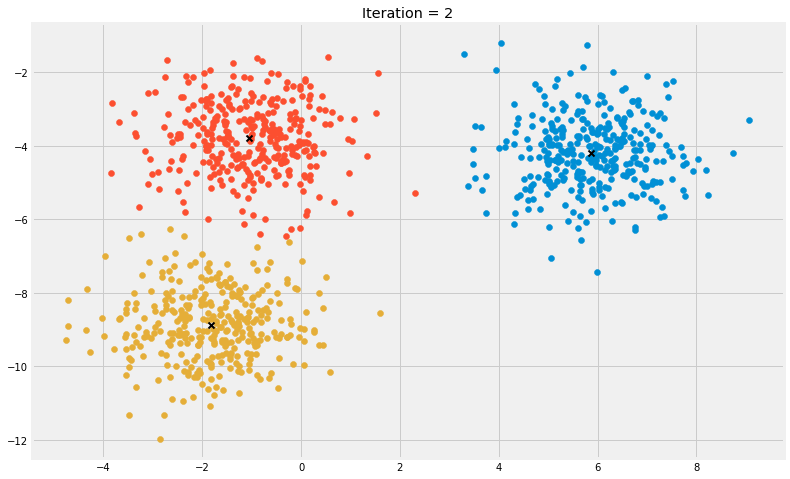

None

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, n_samples=1000, n_features=2, cluster_std=1.0, shuffle=True, random_state=40)
# X, y = make_blobs(centers=3, n_samples=10000, n_features=2, cluster_std=1.5, shuffle=True, random_state=40)
# X, y = make_blobs(centers=3, n_samples=10000, n_features=2, cluster_std=0.5, shuffle=True, random_state=40)
# X, y = make_blobs(centers=5, n_samples=1000, n_features=2, cluster_std=1.0, shuffle=True, random_state=40)
# X, y = make_blobs(centers=3, n_samples=1000, n_features=2, cluster_std=1.0, shuffle=True, random_state=40)
clusters = len(np.unique(y))
k = KMeans(K=clusters, max_iters=150, plot_steps=True, plot_delay=0.25)
y_pred = k.predict(X)

Let's try to find the first $k$ dominant colors using the K-means algorithm:

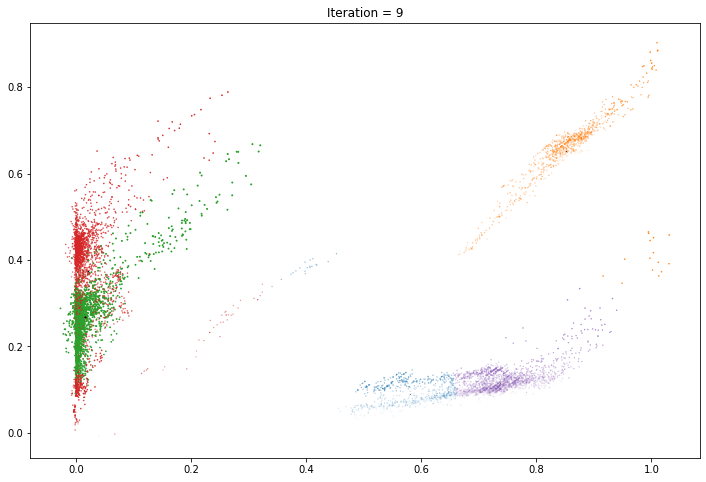

None

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


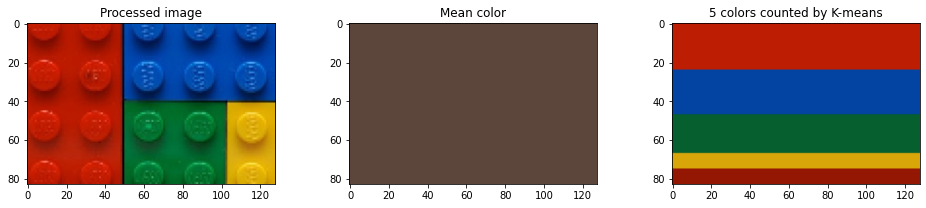

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Step 1 - laod
img = plt.imread("https://www.utia.cas.cz/images/ml1/lego.png")

width = 128
scale_percent = img.shape[1] / width
height = int(img.shape[0] / scale_percent)
dim = (width, height)
img = cv.resize(img, dim, interpolation=cv.INTER_CUBIC)

pixels = np.float32(img.reshape(-1, 3))
n_colors = 5
k = KMeans(K=n_colors, max_iters=100, plot_steps=True, plot_delay=0.25)
y_pred = k.predict(pixels)
_, counts = np.unique(y_pred, return_counts=True)
palette = np.int_(k.centroids * 255)
dominant = palette[np.argmax(counts)]
average = img.mean(axis=0).mean(axis=0)*255

avg_patch = np.ones(shape=img.shape, dtype=np.uint8) * np.uint8(average)
indices = np.argsort(counts)[::-1]
freqs = np.cumsum(np.hstack([[0], counts[indices] / float(counts.sum())]))
rows = np.int_(img.shape[0] * freqs)
dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(img)
ax1.set_title("Processed image")
ax2.imshow(avg_patch)
ax2.set_title(f'Mean color')
ax3.imshow(dom_patch)
ax3.set_title(f'{n_colors} colors counted by K-means')
plt.show()



A bit slow eh? - Let's try using an optimized algorithm from the OpenCV library.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 677 2212 2606 1067 4062]


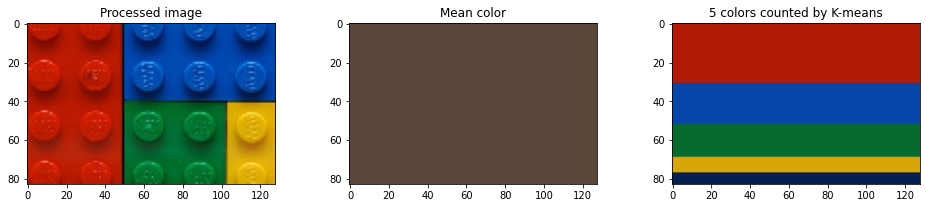

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Step 1 - laod
img = plt.imread("https://staff.utia.cas.cz/novozada/ml1/lego.png")

width = 128
scale_percent = img.shape[1] / width
height = int(img.shape[0] / scale_percent)
dim = (width, height)
img = cv.resize(img, dim, interpolation=cv.INTER_CUBIC)

pixels = np.float32(img.reshape(-1, 3))
n_colors = 5
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv.KMEANS_RANDOM_CENTERS

_, labels, palette = cv.kmeans(pixels, n_colors, None, criteria, 100, flags)
_, counts = np.unique(labels, return_counts=True)
print(counts)
palette = np.int_(palette * 255)
dominant = palette[np.argmax(counts)]
average = img.mean(axis=0).mean(axis=0)*255

avg_patch = np.ones(shape=img.shape, dtype=np.uint8) * np.uint8(average)
indices = np.argsort(counts)[::-1]
freqs = np.cumsum(np.hstack([[0], counts[indices] / float(counts.sum())]))
rows = np.int_(img.shape[0] * freqs)
dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(img)
ax1.set_title("Processed image")
ax2.imshow(avg_patch)
ax2.set_title(f'Mean color')
ax3.imshow(dom_patch)
ax3.set_title(f'{n_colors} colors counted by K-means')
plt.show()